### Load Data

In [5]:
import pandas as pd       
train = pd.read_csv("user_reviews.csv")

In [6]:
train.head()

,grade,user_name,text,date
0,4,mds27272,My gf started playing before me. No option to ...,2020-03-20
1,5,lolo2178,"While the game itself is great, really relaxin...",2020-03-20
2,0,Roachant,My wife and I were looking forward to playing ...,2020-03-20
3,0,Houndf,We need equal values and opportunities for all...,2020-03-20
4,0,ProfessorFox,BEWARE! If you have multiple people in your h...,2020-03-20


In [7]:
train.shape

(2999, 4)

In [11]:
train.columns.values

array(['grade', 'user_name', 'text', 'date'], dtype=object)

In [17]:
from bs4 import BeautifulSoup             

example1 = BeautifulSoup(train["text"][0])  

# Print the raw review and then the output of get_text(), for 
# comparison
print(train["text"][0])
print()
print(example1.get_text())

My gf started playing before me. No option to create my own island and guys, being the 2nd player to start on a console SUCKS!!!! You miss out on so much that only the 1st player gets in terms of activities, resources, etc. It's absolutely terrible. You have to buy a 2nd console if more than one person in your household wants to get the full game experience. That's unacceptable.

My gf started playing before me. No option to create my own island and guys, being the 2nd player to start on a console SUCKS!!!! You miss out on so much that only the 1st player gets in terms of activities, resources, etc. It's absolutely terrible. You have to buy a 2nd console if more than one person in your household wants to get the full game experience. That's unacceptable.


### Data Cleaning and Text Preprocessing

In [18]:
import re
# Use regular expressions to do a find-and-replace
letters_only = re.sub("[^a-zA-Z]",           # The pattern to search for
                      " ",                   # The pattern to replace it with
                      example1.get_text() )  # The text to search
print(letters_only)


My gf started playing before me  No option to create my own island and guys  being the  nd player to start on a console SUCKS     You miss out on so much that only the  st player gets in terms of activities  resources  etc  It s absolutely terrible  You have to buy a  nd console if more than one person in your household wants to get the full game experience  That s unacceptable 


In [19]:
lower_case = letters_only.lower()        # Convert to lower case
words = lower_case.split()               # Split into words

In [23]:
import nltk
nltk.download()  # Download text data sets, including stop words

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [27]:
def review_to_words( raw_review ):
    # Function to convert a raw review to a string of words

    # 1. Remove HTML
    review_text = BeautifulSoup(raw_review).get_text() 
    #
    # 2. Remove non-letters        
    letters_only = re.sub("[^a-zA-Z]", " ", review_text) 
    #
    # 3. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 4. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("english"))                  
    # 
    # 5. Remove stop words
    meaningful_words = [w for w in words if not w in stops]   
    #
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return( " ".join( meaningful_words )) 
    # the string make it easier to use in our Bag of Words

In [34]:
# Get the number of reviews based on the dataframe column size
num_UR = train["text"].size

# Initialize an empty list to hold the clean reviews
clean_train_UR = []

for i in range(num_UR):
    clean_train_UR.append(review_to_words( train["text"][i]))

In [33]:
# Final product after preprocessing
clean_train_UR[0]

'gf started playing option create island guys nd player start console sucks miss much st player gets terms activities resources etc absolutely terrible buy nd console one person household wants get full game experience unacceptable'

In [35]:
print("Creating the bag of words...\n")
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the "CountVectorizer" object, which is scikit-learn's
# bag of words tool.  
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000)    #5000 most frequent words

# fit_transform() does two functions: First, it fits the model
# and learns the vocabulary; second, it transforms our training data
# into feature vectors. The input to fit_transform should be a list of 
# strings.
train_data_features = vectorizer.fit_transform(clean_train_UR)

# Numpy arrays are easy to work with, so convert the result to an 
# array
train_data_features = train_data_features.toarray()

Creating the bag of words...



In [50]:
train_data_features.shape

(2999, 5000)

In [51]:
# Take a look at the words in the vocabulary
vocab = vectorizer.get_feature_names()
vocab[:10]

['aaa',
 'abilities',
 'ability',
 'able',
 'absolute',
 'absolutely',
 'absurd',
 'abused',
 'abusive',
 'abysmal']

In [52]:
import numpy as np
import csv

# Sum up the counts of each vocabulary word
dist = np.sum(train_data_features, axis=0)
hot_words = csv.writer(open('hot_words.csv', 'w'))
hot_words.writerow(['Word', 'Counts'])

for tag, count in zip(vocab, dist):
    hot_words.writerow([tag,count])

In [60]:
df_UR = pd.read_csv('hot_words.csv')
df_UR = df_UR.sort_values('Counts', ascending = False)
# Top 10 key words in user reviews
df_UR[:10]

,Word,Counts
1833,game,8978
2316,island,4041
3050,one,3246
4344,switch,2253
3275,play,2192
3278,player,1890
2959,nintendo,1823
3192,per,1626
826,console,1522
2946,new,1440


In [63]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

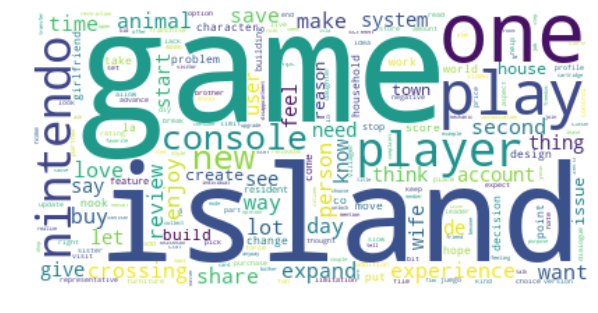

In [78]:
text = " ".join(review for review in df_UR['Word'])
wordcloud = WordCloud(background_color="white").generate(text)
fig = plt.figure(figsize = (10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()